**Best Add Predictor** 

Author: *Achyuth J Shankar*

MAKE SURE YOUR SYSTEM IS CONNECTED FOR INTERNET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv("https://raw.githubusercontent.com/AchyuthJShankar/UCB/main/Ads_CTR_Optimisation.csv")
ds.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
#implement UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

In [4]:
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = ds.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

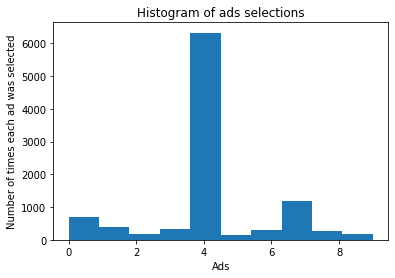

In [5]:
#visualize the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [6]:
N = 10000
d = 10
ads_selected = []
number_of_rewards_0 = [0]*d
number_of_rewards_1 = [0]*d
total_reward = 0

In [7]:
import random
for n in range (0,N):
    ad=0
    max_random=0
    for i in range (0,d):
        random_beta=random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = ds.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad]+=1
    else:
        number_of_rewards_0[ad]+=1
    total_reward += reward 
            
        

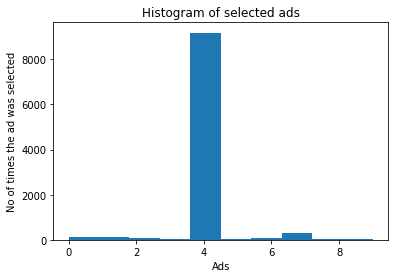

In [8]:
plt.hist(ads_selected)
plt.title("Histogram of selected ads")
plt.xlabel("Ads")
plt.ylabel("No of times the ad was selected")
plt.show()